# Coursera Capstone Project

## *Overview for Opening or Invevesting in a Restaurant in Detroit, Michigan*

### Download the dependencies needed for the analysis

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import mglearn


import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Collecting demographic data of Detroit

### Data extraction and examining Detroit quickfacts from www.census.gov 

In [3]:
dfc = pd.read_html('https://www.census.gov/quickfacts/detroitcitymichigan')
dfc

[  All Topics Population Age and Sex Race and Hispanic Origin Population Characteristics Housing Families & Living Arrangements Computer and Internet Use Education Health Economy Transportation Income & Poverty Businesses Geography  \
 0        Population estimates, July 1, 2019, (V2019)                                                                                                                                                                                     
 
    Detroit city, Michigan  
 0                  670031  ,
                                            Population Unnamed: 1
 0         Population estimates, July 1, 2019, (V2019)     670031
 1   Population estimates base, April 1, 2010, (V2019)     713898
 2   Population, percent change - April 1, 2010 (es...      -6.1%
 3                   Population, Census, April 1, 2010     713777
 4                                         Age and Sex        NaN
 5                      Persons under 5 years, percent     7.3%
 6     

### Loading and exploring the data for an overview of Detroit demographics downloaded from www.census.gov.

The above is downloadable as a csv file. To simplify the process the csv file will be used. 

In [4]:

dfc = pd.read_csv('./QuickFacts May-21-2020.csv',index_col=0)
dfc

,Fact Note,"Detroit city, Michigan","Value Note for Detroit city, Michigan"
Fact,,,
"Population estimates, July 1, 2019, (V2019)",NaN,"670,031",NaN
"Population estimates base, April 1, 2010, (V2019)",NaN,"713,898",NaN
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)",NaN,-6.1%,NaN
"Population, Census, April 1, 2010",NaN,"713,777",NaN
"Persons under 5 years, percent",NaN,7.3%,NaN
"Persons under 18 years, percent",NaN,25.1%,NaN
"Persons 65 years and over, percent",NaN,13.3%,NaN
"Female persons, percent",NaN,52.7%,NaN
"White alone, percent",NaN,14.6%,NaN


### Cleaning up the dataframe

In [5]:
# Drop unwanted conlumns
dfc.drop(columns=['Value Note for Detroit city, Michigan','Fact Note'],axis=1, inplace=True)

dfc.head()

,"Detroit city, Michigan"
Fact,
"Population estimates, July 1, 2019, (V2019)","670,031"
"Population estimates base, April 1, 2010, (V2019)","713,898"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)",-6.1%
"Population, Census, April 1, 2010","713,777"
"Persons under 5 years, percent",7.3%


In [6]:
# Rename column
dfc2 = dfc.rename(columns={'Detroit city, Michigan': "Detroit"})
dfc2.head()

,Detroit
Fact,
"Population estimates, July 1, 2019, (V2019)","670,031"
"Population estimates base, April 1, 2010, (V2019)","713,898"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)",-6.1%
"Population, Census, April 1, 2010","713,777"
"Persons under 5 years, percent",7.3%


In [7]:
# Save to csv file and check action.
dfc2.to_csv('Demo Det.csv')

dfc3=pd.read_csv('Demo Det.csv')
dfc3.head()

,Fact,Detroit
0,"Population estimates, July 1, 2019, (V2019)","670,031"
1,"Population estimates base, April 1, 2010, (V2...","713,898"
2,"Population, percent change - April 1, 2010 (es...",-6.1%
3,"Population, Census, April 1, 2010","713,777"
4,"Persons under 5 years, percent",7.3%


In [8]:
# Check size
print('Shape of dfc3 is:',dfc3.shape)
dfc3
      

Shape of dfc3 is: (83, 2)


,Fact,Detroit
0,"Population estimates, July 1, 2019, (V2019)","670,031"
1,"Population estimates base, April 1, 2010, (V2...","713,898"
2,"Population, percent change - April 1, 2010 (es...",-6.1%
3,"Population, Census, April 1, 2010","713,777"
4,"Persons under 5 years, percent",7.3%
5,"Persons under 18 years, percent",25.1%
6,"Persons 65 years and over, percent",13.3%
7,"Female persons, percent",52.7%
8,"White alone, percent",14.6%
9,"Black or African American alone, percent",78.6%


In [9]:
# Drop useless rows by index

dfc4= dfc3.drop([82,81,80,79,78,77,76,75,74,73,72,71,70,69,68,67,66,65,64,63,62,61,51,50,49,48,47,24,18,])
print('dfc4 shape:',dfc4.shape)
dfc4

dfc4 shape: (54, 2)


,Fact,Detroit
0,"Population estimates, July 1, 2019, (V2019)","670,031"
1,"Population estimates base, April 1, 2010, (V2...","713,898"
2,"Population, percent change - April 1, 2010 (es...",-6.1%
3,"Population, Census, April 1, 2010","713,777"
4,"Persons under 5 years, percent",7.3%
5,"Persons under 18 years, percent",25.1%
6,"Persons 65 years and over, percent",13.3%
7,"Female persons, percent",52.7%
8,"White alone, percent",14.6%
9,"Black or African American alone, percent",78.6%


In [212]:
# Save to csv file and check action.
dfc4.to_csv('Demo Det.csv')

dfc5=pd.read_csv('Demo Det.csv',index_col=0)
dfc5.head()


,Fact,Detroit
0,"Population estimates, July 1, 2019, (V2019)","670,031"
1,"Population estimates base, April 1, 2010, (V2...","713,898"
2,"Population, percent change - April 1, 2010 (es...",-6.1%
3,"Population, Census, April 1, 2010","713,777"
4,"Persons under 5 years, percent",7.3%


## Collecting Detroit zip code and geocoordinate data

Loading the file of Detroit zip codes and geocoordinates obtained from public.opensoft.com API

In [11]:

with open('./public.opendatasoft.com.json') as json_data:
    detroit_data = json.load(json_data)
    
detroit_data

{'nhits': 52,
 'parameters': {'dataset': 'us-zip-code-latitude-and-longitude',
  'timezone': 'UTC',
  'q': 'Detroit',
  'rows': 10,
  'format': 'json',
  'facet': ['state', 'dst']},
 'records': [{'datasetid': 'us-zip-code-latitude-and-longitude',
   'recordid': '8954c218d56ab13987da66e6877b400ee4e0e24e',
   'fields': {'city': 'Detroit',
    'zip': '48238',
    'dst': 1,
    'geopoint': [42.396736, -83.14152],
    'longitude': -83.14152,
    'state': 'MI',
    'latitude': 42.396736,
    'timezone': -5},
   'geometry': {'type': 'Point', 'coordinates': [-83.14152, 42.396736]},
   'record_timestamp': '2018-02-09T16:33:38.603000+00:00'},
  {'datasetid': 'us-zip-code-latitude-and-longitude',
   'recordid': '7011ef7a6673b2b84687eda08bafb0292e9e3356',
   'fields': {'city': 'Detroit',
    'zip': '48297',
    'dst': 1,
    'geopoint': [42.239933, -83.150823],
    'longitude': -83.150823,
    'state': 'MI',
    'latitude': 42.239933,
    'timezone': -5},
   'geometry': {'type': 'Point', 'coordina

### Exploring the data

In [12]:
detroit_data.keys()

dict_keys(['nhits', 'parameters', 'records', 'facet_groups'])

In [13]:
dtz_data=detroit_data['records']
dtz_data

[{'datasetid': 'us-zip-code-latitude-and-longitude',
  'recordid': '8954c218d56ab13987da66e6877b400ee4e0e24e',
  'fields': {'city': 'Detroit',
   'zip': '48238',
   'dst': 1,
   'geopoint': [42.396736, -83.14152],
   'longitude': -83.14152,
   'state': 'MI',
   'latitude': 42.396736,
   'timezone': -5},
  'geometry': {'type': 'Point', 'coordinates': [-83.14152, 42.396736]},
  'record_timestamp': '2018-02-09T16:33:38.603000+00:00'},
 {'datasetid': 'us-zip-code-latitude-and-longitude',
  'recordid': '7011ef7a6673b2b84687eda08bafb0292e9e3356',
  'fields': {'city': 'Detroit',
   'zip': '48297',
   'dst': 1,
   'geopoint': [42.239933, -83.150823],
   'longitude': -83.150823,
   'state': 'MI',
   'latitude': 42.239933,
   'timezone': -5},
  'geometry': {'type': 'Point', 'coordinates': [-83.150823, 42.239933]},
  'record_timestamp': '2018-02-09T16:33:38.603000+00:00'},
 {'datasetid': 'us-zip-code-latitude-and-longitude',
  'recordid': '9824cc91acdb7fa9407f70f26d2cd8a77bd388d1',
  'fields': {'

In [14]:
dtz_data[0]

{'datasetid': 'us-zip-code-latitude-and-longitude',
 'recordid': '8954c218d56ab13987da66e6877b400ee4e0e24e',
 'fields': {'city': 'Detroit',
  'zip': '48238',
  'dst': 1,
  'geopoint': [42.396736, -83.14152],
  'longitude': -83.14152,
  'state': 'MI',
  'latitude': 42.396736,
  'timezone': -5},
 'geometry': {'type': 'Point', 'coordinates': [-83.14152, 42.396736]},
 'record_timestamp': '2018-02-09T16:33:38.603000+00:00'}

In [15]:
# create dataframe 
# define the dataframe columns
column_names = ['Zip Code', 'City', 'Latitude', 'Longitude'] 

# instantiate the dataframe
dtz_d = pd.DataFrame(columns=column_names)

dtz_d

,Zip Code,City,Latitude,Longitude


Fill the dataframe

In [148]:
for data in dtz_data:
    zip_code = city_name = data['fields']['zip'] 
    city_name = data['fields']['city']
        
    city_latlon = data['geometry']['coordinates']
    city_lat = city_latlon[1]
    city_lon = city_latlon[0]
    
    dtz_d = dtz.append({'Zip Code': zip_code,
                                          'City': city_name,
                                          'Latitude': city_lat,
                                          'Longitude': city_lon}, ignore_index=True) 

In [155]:
dtz_d

,Zip Code,City,Latitude,Longitude
0,48238,Detroit,42.396736,-83.141520
1,48297,Detroit,42.239933,-83.150823
2,48269,Detroit,42.239933,-83.150823
3,48258,Detroit,42.239933,-83.150823
4,48272,Detroit,42.239933,-83.150823
5,48214,Detroit,42.368137,-82.993140
6,48219,Detroit,42.425236,-83.249020
7,48267,Detroit,42.239933,-83.150823
8,48235,Detroit,42.427636,-83.195470
9,48266,Detroit,42.239933,-83.150823


In [16]:
# Save file and check
dtz_d.to_csv('Detroit Lat Lon.csv')


dtz_d = pd.read_csv('./Detroit Lat Lon.csv',index_col=0)
dtz_d

,Zip Code,City,Latitude,Longitude
0,48238,Detroit,42.396736,-83.141520
1,48297,Detroit,42.239933,-83.150823
2,48269,Detroit,42.239933,-83.150823
3,48258,Detroit,42.239933,-83.150823
4,48272,Detroit,42.239933,-83.150823
5,48214,Detroit,42.368137,-82.993140
6,48219,Detroit,42.425236,-83.249020
7,48267,Detroit,42.239933,-83.150823
8,48235,Detroit,42.427636,-83.195470
9,48266,Detroit,42.239933,-83.150823


### Cleaning of the dataframe and saving to new csv

In [17]:
# Drop duplicate row
dtz_e = dtz_d.drop([10])

dtz_e

,Zip Code,City,Latitude,Longitude
0,48238,Detroit,42.396736,-83.141520
1,48297,Detroit,42.239933,-83.150823
2,48269,Detroit,42.239933,-83.150823
3,48258,Detroit,42.239933,-83.150823
4,48272,Detroit,42.239933,-83.150823
5,48214,Detroit,42.368137,-82.993140
6,48219,Detroit,42.425236,-83.249020
7,48267,Detroit,42.239933,-83.150823
8,48235,Detroit,42.427636,-83.195470
9,48266,Detroit,42.239933,-83.150823


In [18]:
# Drop City column
dtz_e = dtz_e.drop(['City'],axis=1)
dtz_e

,Zip Code,Latitude,Longitude
0,48238,42.396736,-83.141520
1,48297,42.239933,-83.150823
2,48269,42.239933,-83.150823
3,48258,42.239933,-83.150823
4,48272,42.239933,-83.150823
5,48214,42.368137,-82.993140
6,48219,42.425236,-83.249020
7,48267,42.239933,-83.150823
8,48235,42.427636,-83.195470
9,48266,42.239933,-83.150823


In [19]:
# Save to file
dtz_e.to_csv('Detroit Lat Lon Alpha2')
dtz_e

,Zip Code,Latitude,Longitude
0,48238,42.396736,-83.141520
1,48297,42.239933,-83.150823
2,48269,42.239933,-83.150823
3,48258,42.239933,-83.150823
4,48272,42.239933,-83.150823
5,48214,42.368137,-82.993140
6,48219,42.425236,-83.249020
7,48267,42.239933,-83.150823
8,48235,42.427636,-83.195470
9,48266,42.239933,-83.150823


### Let's visualize the above

Use geopy library to get the latitude and longitude values of Detroit.

In [20]:
address = 'Detroit Mi'

geolocator = Nominatim(user_agent="dt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Detroit are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Detroit are 42.3315509, -83.0466403.


In [21]:
# Map of Detroit neighborhoods with zip code markers
map_detroit = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add Popup Markers to map
folium.Marker([ 42.396736,-83.141520],popup='Highland Park 48238').add_to(map_detroit)
map_detroit

folium.Marker([ 42.368137,-82.993140],popup='Indian Village 48214').add_to(map_detroit)
map_detroit

folium.Marker([42.425236,-83.249020],popup='North West Detroit 48219').add_to(map_detroit)
map_detroit

folium.Marker([42.427636, -83.195470],popup='North Detroit 48235').add_to(map_detroit)
map_detroit

folium.Marker([42.331429,-83.045753],popup='Midtown, Corktown 48201').add_to(map_detroit)
map_detroit

folium.Marker([42.239933,-83.150823],popup='South Detroit 48266, 48297,48258,48272,48267,48266').add_to(map_detroit)
map_detroit


The above areas are mostly on the periphery of Detroit. Lets get some additional zip codes and coordinates by
by exploring with Google Maps

### New csv file created from a search of Google Maps of the Detroit area and loaded into pandas dataframe

Since no file of the specific data is available for download, a new csv file was created independently.

Google Maps search: https://www.google.com/maps/search/detroit+neighborhoods/@42.3526622,-83.0926098,12z

In [22]:
dt2=pd.read_csv('Goog_Neigh_Det.csv',index_col=0)
dt2

,Zip Code,Neighborhood,Latitude,Longitude
0,48209,Mexicantown,42.324493,-83.096043
1,48201,Corktown,42.329569,-83.079564
2,48208,Core City,42.349617,-83.093983
3,48226,Downtown Detroit,42.338199,-83.049694
4,48207,Eastern Market,42.352155,-83.039051
5,48211,Poletown,42.372449,-83.049351
6,48214,Indian Village,42.368391,-82.995793
7,48215,Jefferson Chalmers,42.368137,-82.939488
8,48224,East English Village,42.408963,-82.931591
9,48221,University District,42.429746,-83.136212


### Combining the Zip Code file with the Neighborhood file

In [23]:
# Combining dataframes
dt3=dt2.append(dtz_e, ignore_index = True, sort=True) 
dt3

,Latitude,Longitude,Neighborhood,Zip Code
0,42.324493,-83.096043,Mexicantown,48209
1,42.329569,-83.079564,Corktown,48201
2,42.349617,-83.093983,Core City,48208
3,42.338199,-83.049694,Downtown Detroit,48226
4,42.352155,-83.039051,Eastern Market,48207
5,42.372449,-83.049351,Poletown,48211
6,42.368391,-82.995793,Indian Village,48214
7,42.368137,-82.939488,Jefferson Chalmers,48215
8,42.408963,-82.931591,East English Village,48224
9,42.429746,-83.136212,University District,48221


### Replacing the NaN's with a general "City" area designation and reordering the columns

In [24]:
# Reorder the columns and replace NaN's with general City designation.
dt3 = dt3[['Zip Code', 'Neighborhood', 'Latitude', 'Longitude']]

dt3=dt3.fillna('City')
dt3

,Zip Code,Neighborhood,Latitude,Longitude
0,48209,Mexicantown,42.324493,-83.096043
1,48201,Corktown,42.329569,-83.079564
2,48208,Core City,42.349617,-83.093983
3,48226,Downtown Detroit,42.338199,-83.049694
4,48207,Eastern Market,42.352155,-83.039051
5,48211,Poletown,42.372449,-83.049351
6,48214,Indian Village,42.368391,-82.995793
7,48215,Jefferson Chalmers,42.368137,-82.939488
8,48224,East English Village,42.408963,-82.931591
9,48221,University District,42.429746,-83.136212


In [214]:
# Save to csv file and checl action
dt3.to_csv('Goog_Neigh_Det_Appended.csv')

dt3=pd.read_csv('Goog_Neigh_Det_Appended.csv',index_col=0)
dt3.head(10)

,Zip Code,Neighborhood,Latitude,Longitude
0,48209,Mexicantown,42.324493,-83.096043
1,48201,Corktown,42.329569,-83.079564
2,48208,Core City,42.349617,-83.093983
3,48226,Downtown Detroit,42.338199,-83.049694
4,48207,Eastern Market,42.352155,-83.039051
5,48211,Poletown,42.372449,-83.049351
6,48214,Indian Village,42.368391,-82.995793
7,48215,Jefferson Chalmers,42.368137,-82.939488
8,48224,East English Village,42.408963,-82.931591
9,48221,University District,42.429746,-83.136212


### Lets have a look using a folium map


In [26]:
# create map of Detroit using latitude and longitude values
map_det2 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(dt3['Latitude'], dt3['Longitude'], dt3['Zip Code']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_det2)  
    
map_det2

This group looks more promising for exploration

### Next, utilizing the Foursquare API to explore the neighborhoods and segment them

#### Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID = '.' # your Foursquare ID
CLIENT_SECRET = '.' # your Foursquare Secret
VERSION = '20190405' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# Defining the radius and limit of venues.
radius = 1000
LIMIT =100

### Explore Neighborhoods in Detroit

In [28]:
# Creating a function to explore the neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
detroit_venues = getNearbyVenues(names=dt3['Neighborhood'],
                                   latitudes=dt3['Latitude'],
                                   longitudes=dt3['Longitude']
                                  )
detroit_venues

Mexicantown
Corktown
Core City
Downtown Detroit
Eastern Market
Poletown
Indian Village
Jefferson Chalmers
East English Village
University District
City
City
City
City
City
City
City
City
City
City
City


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mexicantown,42.324493,-83.096043,El Club,42.321434,-83.093511,Music Venue
1,Mexicantown,42.324493,-83.096043,Mexicantown Bakery,42.320815,-83.094930,Bakery
2,Mexicantown,42.324493,-83.096043,Taqueria El Rey,42.319166,-83.098925,Mexican Restaurant
3,Mexicantown,42.324493,-83.096043,Flowers Of Vietnam,42.320109,-83.096501,Vietnamese Restaurant
4,Mexicantown,42.324493,-83.096043,La Jalisciense Taqueria,42.321991,-83.091155,Taco Place
5,Mexicantown,42.324493,-83.096043,Mutiny Bar,42.319396,-83.098279,Tiki Bar
6,Mexicantown,42.324493,-83.096043,Neveria La Michoacana,42.320369,-83.095559,Dessert Shop
7,Mexicantown,42.324493,-83.096043,Taqueria & Restaurant Los Corrales,42.320862,-83.103813,Mexican Restaurant
8,Mexicantown,42.324493,-83.096043,Hygrade Restaurant & Deli,42.331628,-83.094073,Deli / Bodega
9,Mexicantown,42.324493,-83.096043,Duly's Place,42.317864,-83.101906,Diner


In [35]:
print(detroit_venues.shape)
detroit_venues.head()

(508, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mexicantown,42.324493,-83.096043,El Club,42.321434,-83.093511,Music Venue
1,Mexicantown,42.324493,-83.096043,Mexicantown Bakery,42.320815,-83.094930,Bakery
2,Mexicantown,42.324493,-83.096043,Taqueria El Rey,42.319166,-83.098925,Mexican Restaurant
3,Mexicantown,42.324493,-83.096043,Flowers Of Vietnam,42.320109,-83.096501,Vietnamese Restaurant
4,Mexicantown,42.324493,-83.096043,La Jalisciense Taqueria,42.321991,-83.091155,Taco Place


### Venues returned for each neighborhood

In [41]:
detroit_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
City,141,141,141,141,141,141
Core City,19,19,19,19,19,19
Corktown,52,52,52,52,52,52
Downtown Detroit,100,100,100,100,100,100
East English Village,32,32,32,32,32,32
Eastern Market,64,64,64,64,64,64
Indian Village,6,6,6,6,6,6
Jefferson Chalmers,19,19,19,19,19,19
Mexicantown,35,35,35,35,35,35


### Unique Venue Category Check

In [42]:
print('There are {} uniques categories.'.format(len(detroit_venues['Venue Category'].unique())))

There are 141 uniques categories.


### Analyzing the Neighborhoods

In [43]:
# one hot encoding
detroit_onehot = pd.get_dummies(detroit_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
detroit_onehot['Neighborhood'] = detroit_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [detroit_onehot.columns[-1]] + list(detroit_onehot.columns[:-1])
detroit_onehot.head()


,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Stadium,Bed & Breakfast,Beer Garden,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Carpet Store,Check Cashing Service,Cheese Shop,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Fishing Spot,Flea Market,Food,Food Truck,Football Stadium,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Opera House,Optical Shop,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Print Shop,Pub,Restaurant,Romanian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Skate Park,Smoke Shop,Snack Place,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Taco Place,Thai Restaurant,Theater,Tiki Bar,Trail,Tunnel,Udon Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mexicantown
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mexicantown
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mexicantown
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Mexicantown
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Mexicantown


In [44]:
detroit_onehot.shape

(508, 142)

#### Group rows by neighborhood and take the mean of the frequency of occurrence of each category

In [45]:
detroit_grouped = detroit_onehot.groupby('Neighborhood').mean().reset_index()
detroit_grouped.head()

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Stadium,Bed & Breakfast,Beer Garden,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Carpet Store,Check Cashing Service,Cheese Shop,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Fishing Spot,Flea Market,Food,Food Truck,Football Stadium,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Opera House,Optical Shop,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Print Shop,Pub,Restaurant,Romanian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Skate Park,Smoke Shop,Snack Place,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Taco Place,Thai Restaurant,Theater,Tiki Bar,Trail,Tunnel,Udon Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop
0,City,0.0,0.014184,0.000000,0.014184,0.007092,0.000000,0.000000,0.000000,0.000000,0.000000,0.06383,0.021277,0.007092,0.000000,0.0,0.000000,0.0,0.007092,0.007092,0.049645,0.000000,0.0,0.007092,0.0,0.007092,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.007092,0.035461,0.007092,0.014184,0.0,0.021277,0.007092,0.007092,0.007092,0.014184,0.014184,0.06383,0.000000,0.007092,0.0,0.042553,0.0,0.007092,0.00000,0.007092,0.0,0.0,0.007092,0.021277,0.014184,0.0,0.000000,0.00000,0.0,0.0,0.00,0.014184,0.007092,0.00,0.0,0.000000,0.007092,0.007092,0.000000,0.00,0.028369,0.007092,0.00,0.0,0.021277,0.0,0.00,0.007092,0.00,0.00,0.0,0.028369,0.021277,0.0,0.0,0.000000,0.000000,0.042553,0.000000,0.0,0.000000,0.00,0.014184,0.007092,0.007092,0.00,0.00,0.007092,0.007092,0.0,0.035461,0.00,0.007092,0.042553,0.021277,0.007092,0.0,0.007092,0.007092,0.000000,0.007092,0.021277,0.021277,0.007092,0.014184,0.000000,0.00000,0.0,0.00,0.0,0.0,0.007092,0.000000,0.028369,0.000000,0.007092,0.00,0.007092,0.0,0.0,0.000000,0.000000,0.0,0.0,0.007092,0.000000,0.000000,0.0
1,Core City,0.0,0.000000,0.052632,0.105263,0.000000,0.000000,0.052632,0.000000,0.000000,0.105263,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.052632,0.052632,0.0,0.000000,0.0,0.052632,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.00,0.105263,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.105263,0.0,0.00,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.052632,0.052632,0.052632,0.000000,0.0,0.052632,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.00000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000

### Confirm new size

In [46]:
detroit_grouped.shape

(11, 142)

### Print each neighborhood along with the top 5 most common venues

### Print each neighborhood along with the top 10 most common venues

In [48]:
num_top_venues = 10

for hood in detroit_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = detroit_grouped[detroit_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----City----
                  venue  freq
0        Discount Store  0.06
1                  Bank  0.06
2          Burger Joint  0.05
3  Fast Food Restaurant  0.04
4           Coffee Shop  0.04
5              Pharmacy  0.04
6                  Park  0.04
7    Mexican Restaurant  0.04
8            Steakhouse  0.03
9                 Hotel  0.03


----Core City----
                   venue  freq
0          Grocery Store  0.11
1            Art Gallery  0.11
2           Intersection  0.11
3                 Bakery  0.11
4            Men's Store  0.05
5  Check Cashing Service  0.05
6                   Café  0.05
7     Mexican Restaurant  0.05
8            Bus Station  0.05
9           Burger Joint  0.05


----Corktown----
                     venue  freq
0       Mexican Restaurant  0.15
1                      Bar  0.08
2              Art Gallery  0.04
3             Cocktail Bar  0.04
4              Coffee Shop  0.04
5                   Bakery  0.04
6  New American Restaurant  0.04
7            

### Write a function to sort the venues in descending order

In [80]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Create the new dataframe and display the top 10 venues for each neighborhood

In [215]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = detroit_grouped['Neighborhood']

for ind in np.arange(detroit_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(detroit_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City,Bank,Discount Store,Burger Joint,Mexican Restaurant,Fast Food Restaurant,Pharmacy,Park,Coffee Shop,Hotel,Steakhouse
1,Core City,Intersection,Grocery Store,Art Gallery,Bakery,Burger Joint,Skate Park,Bus Station,Mediterranean Restaurant,Check Cashing Service,Men's Store
2,Corktown,Mexican Restaurant,Bar,Cocktail Bar,Art Gallery,Coffee Shop,Bakery,New American Restaurant,Pub,Historic Site,Sandwich Place
3,Downtown Detroit,American Restaurant,Coffee Shop,Lounge,Park,Hotel,Steakhouse,Bar,New American Restaurant,Dessert Shop,Burger Joint
4,East English Village,Fast Food Restaurant,Liquor Store,Bar,Pizza Place,Sandwich Place,Fried Chicken Joint,Home Service,Fishing Spot,Deli / Bodega,Diner


#### Scatter plot of the first five most common venues

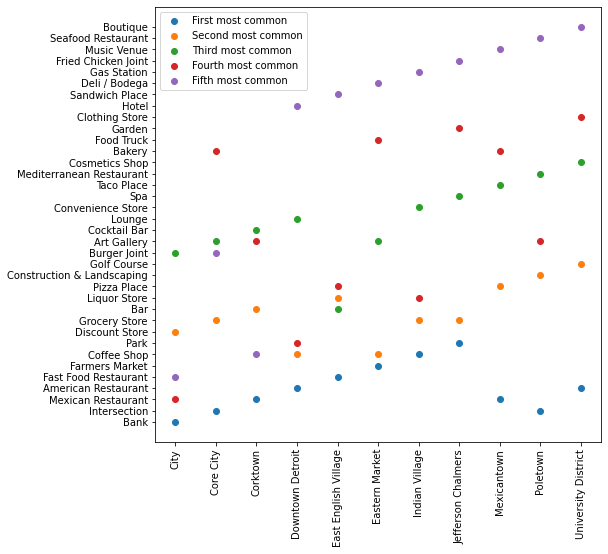

In [191]:
plt.figure(figsize=(8,8))
plt.scatter(neighborhoods_venues_sorted['Neighborhood'],neighborhoods_venues_sorted['1st Most Common Venue'])
plt.scatter(neighborhoods_venues_sorted['Neighborhood'],neighborhoods_venues_sorted['2nd Most Common Venue'])
plt.scatter(neighborhoods_venues_sorted['Neighborhood'],neighborhoods_venues_sorted['3rd Most Common Venue'])
plt.scatter(neighborhoods_venues_sorted['Neighborhood'],neighborhoods_venues_sorted['4th Most Common Venue'])
plt.scatter(neighborhoods_venues_sorted['Neighborhood'],neighborhoods_venues_sorted['5th Most Common Venue'])
plt.xticks(rotation=90)
plt.legend(['First most common', 'Second most common', 'Third most common','Fourth most common','Fifth most common'],loc='upper left')

In [192]:
neighborhoods_venues_sorted.describe()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,11,11,11,11,11,11,11,11,11,11,11
unique,11,8,8,10,9,11,11,11,9,10,11
top,Eastern Market,Intersection,Grocery Store,Art Gallery,Bakery,Deli / Bodega,Food,Steakhouse,Coffee Shop,Dessert Shop,Deli / Bodega
freq,1,2,3,2,2,1,1,1,2,2,1


### Cluster the Neighborhoods

In [193]:
# set number of clusters
kclusters = 4

detroit_grouped_clustering = detroit_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(detroit_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:12] 

array([0, 2, 2, 0, 0, 0, 1, 0, 2, 3, 0])

### Creating a dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [194]:
# merge detroit_grouped with dt3 to add latitude/longitude for each neighborhood

detroit_merged = dt3

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

detroit_merged = detroit_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

detroit_merged.head() # check the last columns!


neighborhoods_venues_sorted


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,City,Bank,Discount Store,Burger Joint,Mexican Restaurant,Fast Food Restaurant,Pharmacy,Park,Coffee Shop,Hotel,Steakhouse
1,2,Core City,Intersection,Grocery Store,Art Gallery,Bakery,Burger Joint,Skate Park,Bus Station,Mediterranean Restaurant,Check Cashing Service,Men's Store
2,2,Corktown,Mexican Restaurant,Bar,Cocktail Bar,Art Gallery,Coffee Shop,Bakery,New American Restaurant,Pub,Historic Site,Sandwich Place
3,0,Downtown Detroit,American Restaurant,Coffee Shop,Lounge,Park,Hotel,Steakhouse,Bar,New American Restaurant,Dessert Shop,Burger Joint
4,0,East English Village,Fast Food Restaurant,Liquor Store,Bar,Pizza Place,Sandwich Place,Fried Chicken Joint,Home Service,Fishing Spot,Deli / Bodega,Diner
5,0,Eastern Market,Farmers Market,Coffee Shop,Art Gallery,Food Truck,Deli / Bodega,Seafood Restaurant,Steakhouse,Food,Clothing Store,Antique Shop
6,1,Indian Village,Coffee Shop,Grocery Store,Convenience Store,Liquor Store,Gas Station,Food,Greek Restaurant,Financial or Legal Service,Construction & Landscaping,Harbor / Marina
7,0,Jefferson Chalmers,Park,Grocery Store,Spa,Garden,Fried Chicken Joint,Liquor Store,Discount Store,Coffee Shop,Chinese Restaurant,Carpet Store
8,2,Mexicantown,Mexican Restaurant,Pizza Place,Taco Place,Bakery,Music Venue,Restaurant,Sandwich Place,Diner,Dessert Shop,Deli / Bodega
9,3,Poletown,Intersection,Construction & Landscaping,Mediterranean Restaurant,Art Gallery,Seafood Restaurant,Speakeasy,Food,Print Shop,Market,Restaurant


### Merging dataframes to add latitude/longitude for each neighborhood then evaluating the number of clusters

In [195]:
# merge detroit_grouped with dt3 to add latitude/longitude for each neighborhood

detroit_merged = dt3

detroit_merged = detroit_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

detroit_merged.head()

,Zip Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,48209,Mexicantown,42.324493,-83.096043,2,Mexican Restaurant,Pizza Place,Taco Place,Bakery,Music Venue,Restaurant,Sandwich Place,Diner,Dessert Shop,Deli / Bodega
1,48201,Corktown,42.329569,-83.079564,2,Mexican Restaurant,Bar,Cocktail Bar,Art Gallery,Coffee Shop,Bakery,New American Restaurant,Pub,Historic Site,Sandwich Place
2,48208,Core City,42.349617,-83.093983,2,Intersection,Grocery Store,Art Gallery,Bakery,Burger Joint,Skate Park,Bus Station,Mediterranean Restaurant,Check Cashing Service,Men's Store
3,48226,Downtown Detroit,42.338199,-83.049694,0,American Restaurant,Coffee Shop,Lounge,Park,Hotel,Steakhouse,Bar,New American Restaurant,Dessert Shop,Burger Joint
4,48207,Eastern Market,42.352155,-83.039051,0,Farmers Market,Coffee Shop,Art Gallery,Food Truck,Deli / Bodega,Seafood Restaurant,Steakhouse,Food,Clothing Store,Antique Shop


In [196]:
# Save merged dataframes to csv

detroit_merged.to_csv('Detroit merged clusters.csv')


### Lets visualize the four clusters with a scatter plot
Note that using four clusters was initially determined by running the algorithm through clusters two to nine.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

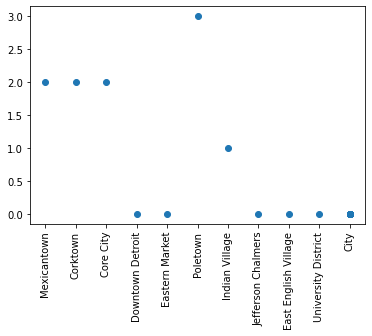

In [197]:
# Scatter Plot of the four clusters
plt.scatter(detroit_merged['Neighborhood'],detroit_merged['Cluster Labels'])# see Neighborhood for Zip Code
plt.xticks(rotation=90)

## Evaluating the number of clusters - plotting with the elbow method

In [209]:
# Having a look at the sum of squared error
k_rng =range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(detroit_merged[['Zip Code','Cluster Labels']])
    sse.append(km.inertia_)

# Sum of Squared error
sse

[15733.238095238099,
 2625.2333333333336,
 1418.1111111111113,
 637.811111111111,
 371.20000000000005,
 216.4142857142857,
 128.21428571428572,
 71.33333333333333,
 46.33333333333333]

### Elbow Plot

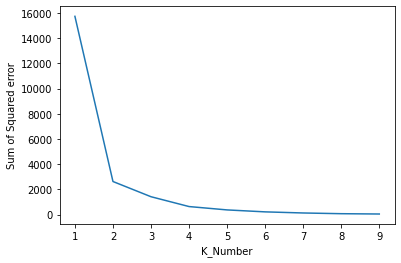

In [210]:
plt.xlabel('K_Number')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng,sse)

### Mapping the Clusters

In [223]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(detroit_merged['Latitude'], detroit_merged['Longitude'], detroit_merged['Neighborhood'], detroit_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining the Clusters

#### First Cluster

Cluster label 0

In [201]:
detroit_merged.loc[detroit_merged['Cluster Labels'] == 0, detroit_merged.columns[[1] + list(range(5, detroit_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Downtown Detroit,American Restaurant,Coffee Shop,Lounge,Park,Hotel,Steakhouse,Bar,New American Restaurant,Dessert Shop,Burger Joint
4,Eastern Market,Farmers Market,Coffee Shop,Art Gallery,Food Truck,Deli / Bodega,Seafood Restaurant,Steakhouse,Food,Clothing Store,Antique Shop
7,Jefferson Chalmers,Park,Grocery Store,Spa,Garden,Fried Chicken Joint,Liquor Store,Discount Store,Coffee Shop,Chinese Restaurant,Carpet Store
8,East English Village,Fast Food Restaurant,Liquor Store,Bar,Pizza Place,Sandwich Place,Fried Chicken Joint,Home Service,Fishing Spot,Deli / Bodega,Diner
9,University District,American Restaurant,Golf Course,Cosmetics Shop,Clothing Store,Boutique,Insurance Office,Intersection,Mediterranean Restaurant,Business Service,Shoe Store
10,City,Bank,Discount Store,Burger Joint,Mexican Restaurant,Fast Food Restaurant,Pharmacy,Park,Coffee Shop,Hotel,Steakhouse
11,City,Bank,Discount Store,Burger Joint,Mexican Restaurant,Fast Food Restaurant,Pharmacy,Park,Coffee Shop,Hotel,Steakhouse
12,City,Bank,Discount Store,Burger Joint,Mexican Restaurant,Fast Food Restaurant,Pharmacy,Park,Coffee Shop,Hotel,Steakhouse
13,City,Bank,Discount Store,Burger Joint,Mexican Restaurant,Fast Food Restaurant,Pharmacy,Park,Coffee Shop,Hotel,Steakhouse
14,City,Bank,Discount Store,Burger Joint,Mexican Restaurant,Fast Food Restaurant,Pharmacy,Park,Coffee Shop,Hotel,Steakhouse


#### Second Cluster

Cluster label 1

In [202]:
detroit_merged.loc[detroit_merged['Cluster Labels'] == 1, detroit_merged.columns[[1] + list(range(5, detroit_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Indian Village,Coffee Shop,Grocery Store,Convenience Store,Liquor Store,Gas Station,Food,Greek Restaurant,Financial or Legal Service,Construction & Landscaping,Harbor / Marina


#### Third Cluster

Cluster label 2

In [203]:
detroit_merged.loc[detroit_merged['Cluster Labels'] == 2, detroit_merged.columns[[1] + list(range(5, detroit_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mexicantown,Mexican Restaurant,Pizza Place,Taco Place,Bakery,Music Venue,Restaurant,Sandwich Place,Diner,Dessert Shop,Deli / Bodega
1,Corktown,Mexican Restaurant,Bar,Cocktail Bar,Art Gallery,Coffee Shop,Bakery,New American Restaurant,Pub,Historic Site,Sandwich Place
2,Core City,Intersection,Grocery Store,Art Gallery,Bakery,Burger Joint,Skate Park,Bus Station,Mediterranean Restaurant,Check Cashing Service,Men's Store


#### Fourth Cluster

Cluster label 3

In [204]:
detroit_merged.loc[detroit_merged['Cluster Labels'] == 3, detroit_merged.columns[[1] + list(range(5, detroit_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Poletown,Intersection,Construction & Landscaping,Mediterranean Restaurant,Art Gallery,Seafood Restaurant,Speakeasy,Food,Print Shop,Market,Restaurant
